In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
import pandas as pd

from gpr4im import pk_tools as pk
from gpr4im import obs_tools as obs

In [2]:
# for plotting:
%matplotlib inline

font = {"size": 16, "family": "STIXGeneral"}
axislabelfontsize = "x-large"
plt.rc("font", **font)
plt.rcParams["text.usetex"] = True

### Loading HI Data
Load in the unsmoothed HI data and calculate the power spectrum

In [3]:
data = pd.read_pickle('../Data/data.pkl')
HI_unsmoothed = data.nobeam.HI

In [4]:
# Dimension of data cube:
lx,ly,lz = 1000,1000, 924.78 #Mpc/h
nx,ny,nz = 256, 256, 285
# Measure the auto-power spectrum, with noise:
kmin = 2*np.pi/pow(lx*ly*lz, 1/3)
kmax= 1
dk = 2*kmin
nkbin = int((kmax-kmin)/dk)
kbins = np.arange(kmin,kmax,dk)
k = np.linspace(kmin+0.5*dk,kmax-0.5*dk,nkbin)
# weighting and window function:
w = W = np.ones((nx,ny,nz))

In [5]:
# calculate power spectrum:
pk_HI_unsmoothed = pk.getpk(HI_unsmoothed,w,W,nx,ny,nz,lx,ly,lz,kbins)[0]

### Smoothing the data with telescope beam

In [6]:
zmax = 0.58
sigma_beam = 1.55
HI_smoothed = obs.ConvolveCube(np.copy(HI_unsmoothed),zmax,lx,ly,sigma_beam, cosmo)
# note: running the ConvolveCube function changes the original HI_unsmoothed map, so
# don't run it more than once, or use np.copy!

Below we plot one redshift slice from the smoothed vs. unsmoothed cases, to show how the telescope beam smooths the small scales.

Text(0.5, 1.0, 'HI (smoothed)')

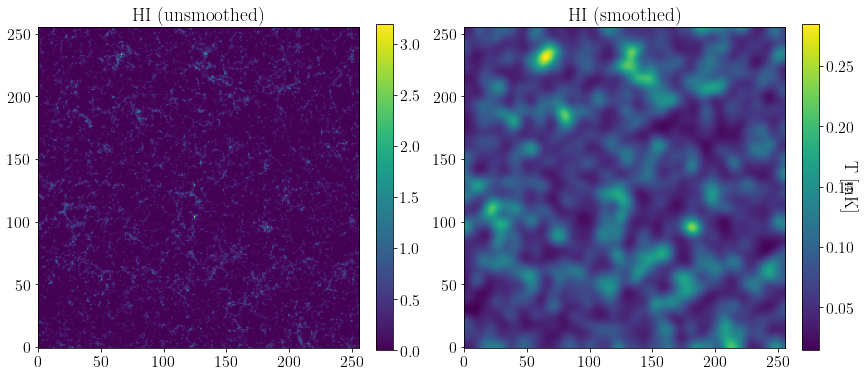

In [7]:
plt.figure(figsize=(14,6))

plt.subplot(121)
pos = plt.imshow(HI_unsmoothed[:,:,100], origin = 'lower', cmap='viridis')
plt.colorbar(pos, fraction=0.046)
plt.title('HI (unsmoothed)')

plt.subplot(122)
pos = plt.imshow(HI_smoothed[:,:,100], origin = 'lower', cmap='viridis')
cbar = plt.colorbar(pos, fraction=0.046)
cbar.ax.set_ylabel(r'T [mK]', rotation=270, fontsize=18)
plt.title('HI (smoothed)')

In [8]:
# calculate power spectrum:
pk_HI_smoothed = pk.getpk(HI_smoothed,w,W,nx,ny,nz,lx,ly,lz,kbins)[0]

Plotting power spectra to compare the smoothed vs. unsmoothed cases.

Text(0.5, 0, 'k [h/Mpc]')

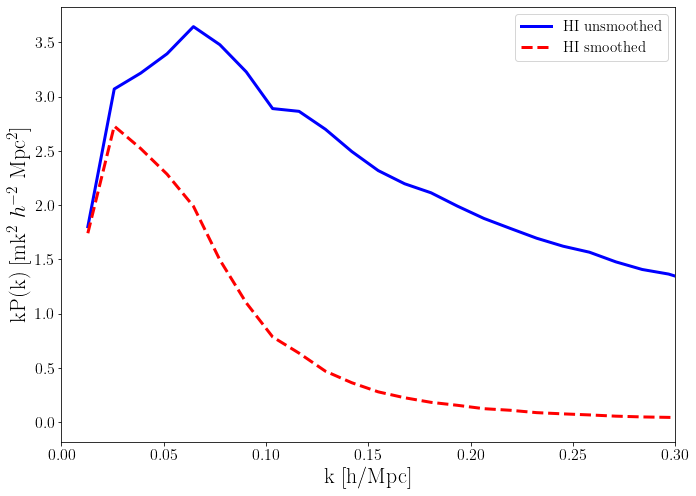

In [11]:
plt.figure(figsize=(11,8))

plt.plot(k, (k*pk_HI_unsmoothed), ls='solid', lw=3, c='b', label = r'HI unsmoothed')
plt.plot(k, (k*pk_HI_smoothed), ls='--', lw=3, c='r', label = r'HI smoothed')

plt.legend(fontsize=15)
plt.xlim(0,0.3)
plt.ylabel(r'kP(k) [mk$^2$ $h^{-2}$ Mpc$^2$]', fontsize=22)
plt.xlabel('k [h/Mpc]', fontsize=22)